In [151]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as sts 
from getForcingFunctions import getInterpolate, getPrecip
import random

In [152]:
x = np.linspace(0, np.pi, 10000)

In [153]:
diurn_cycle_raw = 1290 * np.sin(x)

1440

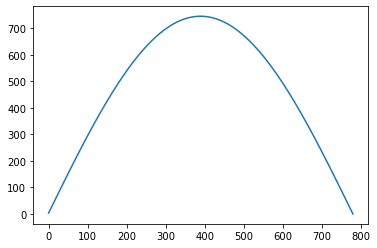

In [265]:
day_length = 13

free_time = (24 - day_length)*60/2. # In minutes!
    
free_time = int(free_time)

day_time_shift = np.linspace(free_time, day_length*60 + free_time - 1, day_length*60)
day_time = np.linspace(1, day_length*60, day_length*60)

pre_day = np.zeros(free_time)
post_day = np.zeros(free_time) # i.e., the time from sundown to the end of the day
    
day_avg = 745 * np.sin(np.pi * day_time * (day_length*60)**(-1))

tot_day = np.hstack((pre_day, day_avg, post_day))

plt.plot(day_avg)

len(tot_day)

(array([   5.,   10.,   28.,   69.,  178.,  412.,  927., 1995., 3382.,
        2994.]),
 array([-0.43274626, -0.25730023, -0.0818542 ,  0.09359183,  0.26903786,
         0.44448389,  0.61992992,  0.79537595,  0.97082198,  1.14626801,
         1.32171404]),
 <BarContainer object of 10 artists>)

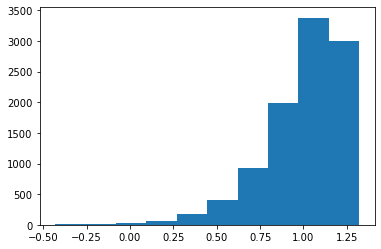

In [266]:
vals = sts.pearson3.rvs(-1.4261204198965, loc=1, scale=0.23, size=10000)

plt.hist(vals)

In [267]:
np.mean(vals), np.amax(vals)

(0.9997448073676692, 1.3217140357237482)

In [268]:
means = []
diurns = []
maxes = []

randomvalues = sts.pearson3.rvs(-1.4261204198965, loc=1, scale=0.23, size=10000)

goodvals = np.where(randomvalues >= 0)[0]

for i in range(0, 10000):
    goodval_index = np.random.choice(goodvals)
    tmp_diurn = day_avg * randomvalues[goodval_index]
    tmp_mean = np.mean(tmp_diurn)
    tmp_max = np.amax(tmp_diurn)
    means.append(tmp_mean)
    diurns.append(tmp_diurn)
    maxes.append(tmp_max)

In [269]:
np.amax(diurns), np.mean(diurns), np.amax(means)

(983.5833437872417, 475.5054549908433, 626.1677579385845)

(array([  48.,   50.,  141.,  234.,  362.,  814., 1338., 2155., 2887.,
        1971.]),
 array([  8.83230667,  70.5658518 , 132.29939693, 194.03294205,
        255.76648718, 317.50003231, 379.23357743, 440.96712256,
        502.70066769, 564.43421281, 626.16775794]),
 <BarContainer object of 10 artists>)

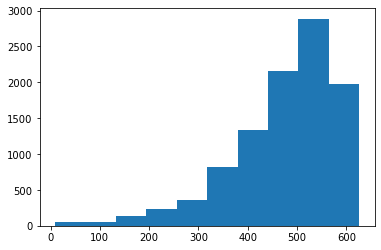

In [270]:
plt.hist(means)

(-1.36914192425752, 1.0, 1.1539404303694312)

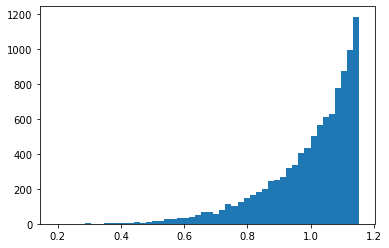

In [50]:
betas = np.random.beta(6,.9,size=10000)

plt.hist(betas/np.mean(betas),50)

sts.skew(betas/np.mean(betas)), np.mean(betas/np.mean(betas)), np.amax(betas/np.mean(betas))

(array([ 2.,  2.,  0.,  1.,  6.,  0.,  2.,  2.,  2.,  3.,  6.,  2.,  7.,
        11.,  4., 11., 11.,  6., 12., 14., 18., 16., 21., 18., 16., 28.,
        25., 26., 31., 35., 39., 27., 32., 41., 40., 30., 45., 33., 38.,
        42., 38., 39., 33., 39., 36., 33., 25., 23., 19., 10.]),
 array([0.26603718, 0.2806579 , 0.29527862, 0.30989934, 0.32452006,
        0.33914078, 0.3537615 , 0.36838222, 0.38300294, 0.39762366,
        0.41224438, 0.4268651 , 0.44148582, 0.45610653, 0.47072725,
        0.48534797, 0.49996869, 0.51458941, 0.52921013, 0.54383085,
        0.55845157, 0.57307229, 0.58769301, 0.60231373, 0.61693445,
        0.63155517, 0.64617589, 0.66079661, 0.67541732, 0.69003804,
        0.70465876, 0.71927948, 0.7339002 , 0.74852092, 0.76314164,
        0.77776236, 0.79238308, 0.8070038 , 0.82162452, 0.83624524,
        0.85086596, 0.86548668, 0.8801074 , 0.89472812, 0.90934883,
        0.92396955, 0.93859027, 0.95321099, 0.96783171, 0.98245243,
        0.99707315]),
 <BarContainer

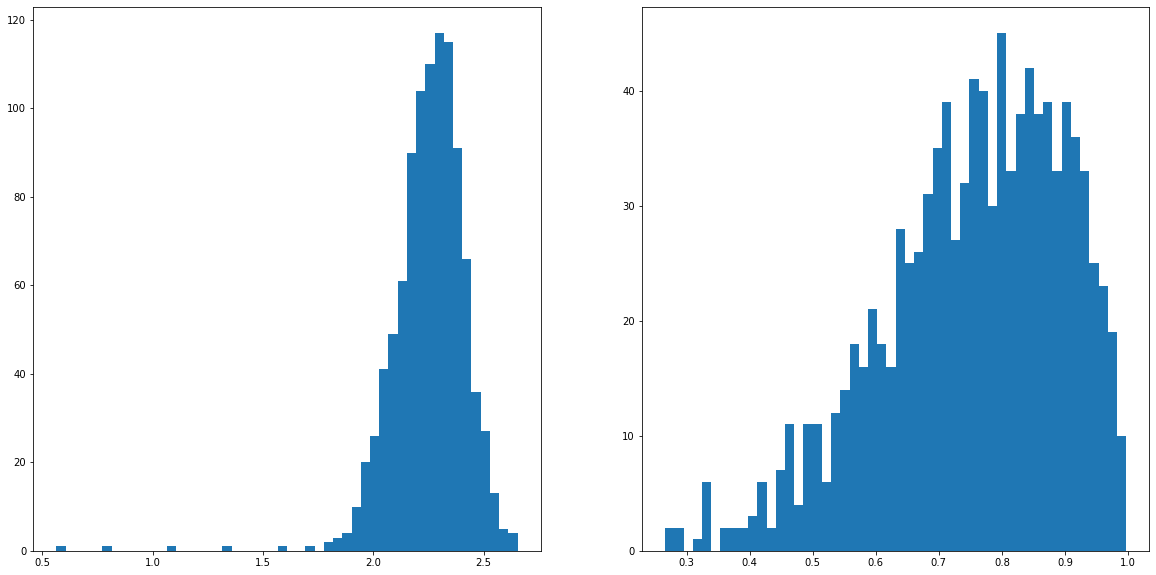

In [121]:
rho = 0.8

newweights = np.random.beta(6,2, size=1000)
weights = np.random.beta(6,2, size=1000)

for i in range(1, weights.shape[0]):
    newweights[i] = rho * newweights[i-1] + (1 - rho**2)**(0.5) * np.random.beta(6,2)

means = []

for i in range(0, weights.shape[0]):
    tmp_diurn = newweights[i] * tot_day
    tmp_mean = np.mean(tmp_diurn)
    means.append(tmp_mean)
    
fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].hist(newweights, 50)
ax[1].hist(weights, 50)

(array([  42.,   55.,  144.,  240.,  507.,  791., 1416., 2222., 2596.,
        1987.]),
 array([   5.5181802 ,  111.71571552,  217.91325083,  324.11078615,
         430.30832147,  536.50585679,  642.70339211,  748.90092743,
         855.09846275,  961.29599807, 1067.49353339]),
 <BarContainer object of 10 artists>)

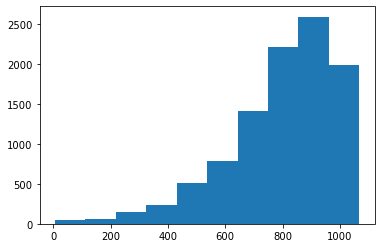

In [127]:
plt.hist(maxes)

In [114]:
test = np.zeros(10000)

for i in range(0, test.shape[0]):
    test[i] = np.random.beta(5, 1.5)

(array([  14.,   55.,  160.,  352.,  650., 1002., 1560., 2010., 2328.,
        1869.]),
 array([0.14018211, 0.22614803, 0.31211395, 0.39807987, 0.48404579,
        0.57001171, 0.65597762, 0.74194354, 0.82790946, 0.91387538,
        0.9998413 ]),
 <BarContainer object of 10 artists>)

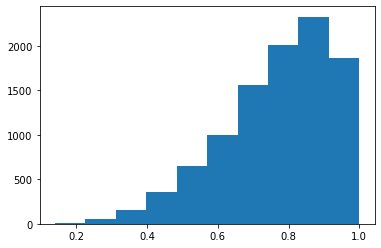

In [4]:
plt.hist(test)

In [9]:
### PARAMETER SETUP ###
    
# Some parameters of getRedNoise are fed in from the SGP data, and thus are stored in 
# stats_array.

#rad_anom_norm = 75.
rad_anom_norm = 75.

# they create an envelope of allowable sw radiation for the model.

sw_limit = 1290. # highest allowable daily peak in radiation
sw_average = 800.
sw_min = 150.  # lowest allowable daily peak in radiation

# Set to 0.6 in SLAM, these are correlation coefficients, and must be in (0,1). So for
# consistency:

r_temp = 0.6
r_hum = 0.6
r_rad = 0.7

day_length = 13 # IN HOURS

### CYCLE INITIALIZATION ###

# The basic cycle is formed by taking a unit of free_time, then a unit of day_length,
# then another unit of free_time. This reconstructs the full 24 hour day, and will be 
# a useful structure going forward.

free_time = (24 - day_length)*60/2. # In minutes!

free_time = int(free_time)

# Put the time of the day between, say, 9 and 5 and not from 0 to 8.

day_time_shift = np.linspace(free_time, day_length*60 + free_time - 1, day_length*60)
day_time = np.linspace(1, day_length*60, day_length*60)

# Create radiation profiles as sin waves

day_max = sw_limit * np.sin(np.pi * day_time * (day_length*60)**(-1))
day_avg = sw_average * np.sin(np.pi * day_time * (day_length*60)**(-1))
day_min = sw_min * np.sin(np.pi * day_time * (day_length*60)**(-1))

# make "preday" and "postday," i.e., the time that does not include radiation

pre_day = np.linspace(0, free_time - 1, free_time)
post_day = np.linspace(day_length*60 + free_time, 24*60 - 1, free_time) # i.e., the time from sundown to the end of the day

# make a 'no radiation' array

no_rad = np.zeros(len(pre_day))

# make an array of times that includes the entire day, from midnight to midnight (the next day)

tot_day = np.hstack((pre_day, day_time_shift, post_day))
tot_day_sw_max = np.hstack((no_rad, day_max, no_rad))
tot_day_sw_avg = np.hstack((no_rad, day_avg, no_rad))
tot_day_sw_min = np.hstack((no_rad, day_min, no_rad))

In [10]:
# now we want to extend the above daily framework to the entire summer!

all_summer_time = 92*24*60 # 92 days in summer, 24 hours in a day, 60 mins in an hour

sw_max_sum = np.tile(tot_day_sw_max, 92) # make 92 days worth of the same radiation
sw_avg_sum = np.tile(tot_day_sw_avg, 92)
sw_min_sum = np.tile(tot_day_sw_min, 92)

In [13]:
### CREATE RED NOISE FORCING ###

# characteristic time scale of correlation is ~6 hours

num_sixhr = 92 * 4 # number of days * number of 6 hour periods per day

day_vals = np.linspace(0, 1.5*np.pi, 4)
day_trend = np.sin(day_vals)

In [19]:
rad_summer = np.tile(day_trend, 92)

i = 1
while i < num_sixhr:

    rad_rand = random.gauss(0,1)

    # add day by day variability; correlate the data
    # factor of (1-r^2)^0.5 makes the variance of the temp distribution the same as the
    # random distribution's that we chose temp_rand from, i.e., is one

    rad_summer[i] = r_rad * rad_summer[i-1] + ((1 - r_rad**2)**(0.5)) * rad_rand

    i += 1

rad_summer_min = getInterpolate(rad_summer * rad_anom_norm, all_summer_time)

In [21]:
### PRECIP AND CLOUD FORCING ###

cf = np.zeros(all_summer_time)
F_solar = np.zeros(all_summer_time)

j = 0
while j < all_summer_time:

    rad_val = sw_avg_sum[j] + rad_summer_min[j]
    max_rad_val = sw_max_sum[j]
    min_rad_val = sw_min_sum[j]

    F_solar[j] = rad_val

    if F_solar[j] < 0:
        F_solar[j] = 0

    if F_solar[j] > max_rad_val:
        F_solar[j] = max_rad_val

    if F_solar[j] < min_rad_val and F_solar[j] > 0:
        F_solar[j] = min_rad_val 

    j += 1
    
# condition rad_summer_min < - rad_anom_norm * 1.25 implies the cloud red noise must be large to gen precip
cloud_atlas = np.where(rad_summer_min < -rad_anom_norm * 1.25) # tells us where clouds are so we can correlate P and F, i.e., make sure 
# there isn't a lot of radiation on rainy days
cloud_count = len(cloud_atlas[0]) # number of cloudy days

stats_array = [0,0,0,0,200,.02,.02]
precip = np.zeros(all_summer_time)
precip_array = getPrecip(stats_array)

k = 0

# make sure precip only happens on days where there are clouds 
while k < len(precip_array):
    rand_cloud_dex = random.randint(0, cloud_count-1)
    precip_dex = cloud_atlas[rand_cloud_dex]
    precip[precip_dex] = precip_array[k]
    k += 1

187.48488935013927


In [32]:
test = np.where(rad_summer_min < -rad_anom_norm * 1.25)
testing = len(test[0])
test[0].sort()
cloud_atlas.sort()

In [35]:
import collections 

if collections.Counter(test[0]) == collections.Counter(cloud_atlas): 
    print ("The lists are identical") 
else : 
    print ("The lists are not identical") 

The lists are identical
